# NLP and Neural Networks

In this exercise, we'll apply our knowledge of neural networks to process natural language. As we did in the bigram exercise, the goal of this lab is to predict the next word, given the previous one.

Team members:

- Angel Molina
- Daniel Marin

### Data set

Load the text from "One Hundred Years of Solitude" that we used in our bigrams exercise. It's located in the data folder.

### Important note:

Start with a smaller part of the text. Maybe the first 10 parragraphs, as the number of tokens rapidly increases as we add more text.

Later you can use a bigger corpus.

In [ ]:
import torch
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()

Don't forget to prepare the data by generating the corresponding tokens.

In [ ]:
text = open('./data/cap1.txt', 'r').read().lower()

paragraphs = text.split('\n\n')

first_10_paragraphs = paragraphs[:10]

In [ ]:
# Convert each integer to a string and then join them
result = ''.join(map(str, first_10_paragraphs))

print(result)

muchos años después, frente al pelotón de fusilamiento, el coronel aureliano buendía había de recordar aquella tarde remota en que su padre lo llevó a conocer el hielo. macondo era entonces una aldea de veinte casas de barro y cañabrava construidas a la orilla de un río de aguas diáfanas que se precipitaban por un lecho de piedras pulidas, blancas y enormes como huevos prehistóricos. el mundo era tan reciente, que muchas cosas carecían de nombre, y para mencionarlas había que señalarlas con el dedo. todos los años, por el mes de marzo, una familia de gitanos desarrapados plantaba su carpa cerca de la aldea, y con un grande alboroto de pitos y timbales daban a conocer los nuevos inventos. primero llevaron el imán. un gitano corpulento, de barba montaraz y manos de gorrión, que se presentó con el nombre de melquíades, hizo una truculenta demostración pública de lo que él mismo llamaba la octava maravilla de los sabios alquimistas de macedonia. fue de casa en casa arrastrando dos lingotes

In [ ]:
tokensP = tokenizer.tokenize(result)

In [ ]:
tokensP

['muchos',
 'años',
 'después',
 ',',
 'frente',
 'al',
 'pelotón',
 'de',
 'fusilamiento',
 ',',
 'el',
 'coronel',
 'aureliano',
 'buendía',
 'había',
 'de',
 'recordar',
 'aquella',
 'tarde',
 'remota',
 'en',
 'que',
 'su',
 'padre',
 'lo',
 'llevó',
 'a',
 'conocer',
 'el',
 'hielo.',
 'macondo',
 'era',
 'entonces',
 'una',
 'aldea',
 'de',
 'veinte',
 'casas',
 'de',
 'barro',
 'y',
 'cañabrava',
 'construidas',
 'a',
 'la',
 'orilla',
 'de',
 'un',
 'río',
 'de',
 'aguas',
 'diáfanas',
 'que',
 'se',
 'precipitaban',
 'por',
 'un',
 'lecho',
 'de',
 'piedras',
 'pulidas',
 ',',
 'blancas',
 'y',
 'enormes',
 'como',
 'huevos',
 'prehistóricos.',
 'el',
 'mundo',
 'era',
 'tan',
 'reciente',
 ',',
 'que',
 'muchas',
 'cosas',
 'carecían',
 'de',
 'nombre',
 ',',
 'y',
 'para',
 'mencionarlas',
 'había',
 'que',
 'señalarlas',
 'con',
 'el',
 'dedo.',
 'todos',
 'los',
 'años',
 ',',
 'por',
 'el',
 'mes',
 'de',
 'marzo',
 ',',
 'una',
 'familia',
 'de',
 'gitanos',
 'desarrapad

In [ ]:
len(tokensP)

3297

### Let's prepare the data set.

Our neural network needs to have an input X and an output y. Remember that these sets are numerical, so you'd need something to map the tokens into numbers, and viceversa.

In [ ]:
from collections import defaultdict

# Create a mapping of tokens to unique numerical indices
token_to_idx = defaultdict(lambda: len(token_to_idx))  # Assign unique indices as tokens are encountered
idx_to_token = {}

# Populate token-to-index and index-to-token dictionaries
for token in tokensP:
    index = token_to_idx[token]
    idx_to_token[index] = token

# Convert tokens to their respective indices
tokens_indices = [token_to_idx[token] for token in tokensP]

print(f"Token to Index Mapping: {dict(list(token_to_idx.items())[:10])}")  # Show first 10 mappings


Token to Index Mapping: {'muchos': 0, 'años': 1, 'después': 2, ',': 3, 'frente': 4, 'al': 5, 'pelotón': 6, 'de': 7, 'fusilamiento': 8, 'el': 9}


In [ ]:
from collections import defaultdict

# Step 2: Generate Bigrams (w1, w2)
bigrams = [(tokensP[i], tokensP[i + 1]) for i in range(len(tokensP) - 1)]
print("Bigrams:", bigrams)

# Step 3: Create Vocabulary and Map Tokens to Numbers
vocab = defaultdict(lambda: len(vocab))  # Generates IDs for new tokens
X = [vocab[w1] for w1, w2 in bigrams]
y = [vocab[w2] for w1, w2 in bigrams]

print("X (input vector):", X)
print("y (output vector):", y)


Bigrams: [('muchos', 'años'), ('años', 'después'), ('después', ','), (',', 'frente'), ('frente', 'al'), ('al', 'pelotón'), ('pelotón', 'de'), ('de', 'fusilamiento'), ('fusilamiento', ','), (',', 'el'), ('el', 'coronel'), ('coronel', 'aureliano'), ('aureliano', 'buendía'), ('buendía', 'había'), ('había', 'de'), ('de', 'recordar'), ('recordar', 'aquella'), ('aquella', 'tarde'), ('tarde', 'remota'), ('remota', 'en'), ('en', 'que'), ('que', 'su'), ('su', 'padre'), ('padre', 'lo'), ('lo', 'llevó'), ('llevó', 'a'), ('a', 'conocer'), ('conocer', 'el'), ('el', 'hielo.'), ('hielo.', 'macondo'), ('macondo', 'era'), ('era', 'entonces'), ('entonces', 'una'), ('una', 'aldea'), ('aldea', 'de'), ('de', 'veinte'), ('veinte', 'casas'), ('casas', 'de'), ('de', 'barro'), ('barro', 'y'), ('y', 'cañabrava'), ('cañabrava', 'construidas'), ('construidas', 'a'), ('a', 'la'), ('la', 'orilla'), ('orilla', 'de'), ('de', 'un'), ('un', 'río'), ('río', 'de'), ('de', 'aguas'), ('aguas', 'diáfanas'), ('diáfanas', 'qu

In [ ]:
# Don't forget that since we are using torch, our training set vectors should be tensors

In [ ]:
X_tensor = torch.tensor(X, dtype=torch.long)
y_tensor = torch.tensor(y, dtype=torch.long)

print("X Tensor:", X_tensor)
print("y Tensor:", y_tensor)

X Tensor: tensor([   0,    1,    2,  ...,   68, 1273, 1274])
y Tensor: tensor([   1,    2,    3,  ..., 1273, 1274, 1275])


In [ ]:
# Note that our vectors are integers, which can be thought as a categorical variables.
# torch provides the one_hot method, that would generate tensors suitable for our nn
# make sure that the dtype of your tensor is float.

In [ ]:
# Convert X_tensor to one-hot encoded tensor
X_one_hot = torch.nn.functional.one_hot(X_tensor, num_classes=len(vocab)).float()
print("X One-Hot Tensor:", X_one_hot)

# Convert y_tensor to one-hot encoded tensor
y_one_hot = torch.nn.functional.one_hot(y_tensor, num_classes=len(vocab)).float()
print("y One-Hot Tensor:", y_one_hot)

X One-Hot Tensor: tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.]])
y One-Hot Tensor: tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])


### Network design
To start, we are going to have a very simple network. Define a single layer network

In [ ]:
# How many neurons should our input layer have?
# Use as many neurons as the total number of categories (from your one-hot encoded tensors)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Define the neural network class
class BigramModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(BigramModel, self).__init__()
        # Single linear layer from input_size to output_size
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        # Pass input through the linear layer
        out = self.linear(x)
        # Apply softmax activation function to get probabilities
        return F.softmax(out, dim=1)

# Initialize the model
vocab_size = len(token_to_idx)  # Number of unique words in the vocabulary
model = BigramModel(input_size=vocab_size, output_size=vocab_size)

# Define the loss function (Cross-Entropy Loss) and the optimizer (SGD)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)

# Number of training epochs
epochs = 100

# Convert y_tensor to long (needed for CrossEntropyLoss)
y_tensor = torch.tensor(y, dtype=torch.long)

# Lists to store loss and accuracy for each epoch
losses = []
accuracies = []

# Training loop
for epoch in range(epochs):
    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_one_hot)

    # Calculate loss
    loss = criterion(outputs, y_tensor)

    # Backward pass and optimize
    loss.backward()
    optimizer.step()

    # Store loss
    losses.append(loss.item())

    # Calculate accuracy
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_tensor).sum().item() / len(y_tensor)
    accuracies.append(accuracy)

    # Print loss and accuracy every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')

print("Training complete.")


Epoch [10/100], Loss: 7.1515, Accuracy: 0.0012
Epoch [20/100], Loss: 7.1515, Accuracy: 0.0012
Epoch [30/100], Loss: 7.1515, Accuracy: 0.0012
Epoch [40/100], Loss: 7.1515, Accuracy: 0.0012
Epoch [50/100], Loss: 7.1515, Accuracy: 0.0012
Epoch [60/100], Loss: 7.1515, Accuracy: 0.0012
Epoch [70/100], Loss: 7.1515, Accuracy: 0.0012
Epoch [80/100], Loss: 7.1515, Accuracy: 0.0012
Epoch [90/100], Loss: 7.1515, Accuracy: 0.0012
Epoch [100/100], Loss: 7.1515, Accuracy: 0.0012
Training complete.


### Analysis

1. Test your network with a few words

In [ ]:
import torch

test_words_spanish = ['arcadio', 'intentarlo', 'tan', 'la']

# Ensure the special token index for unknown words
UNK_IDX = vocab_size  # Assuming this index is not used in vocab_size

# Add a special token in the vocabulary if it isn't already present
token_to_idx['<UNK>'] = UNK_IDX

# Reverse mapping from index to token
idx_to_token = {idx: token for token, idx in token_to_idx.items()}

# Convert test Spanish words to one-hot encoded tensors
test_tensors_spanish = []
for word in test_words_spanish:
    if word in token_to_idx:
        index = token_to_idx[word]
    else:
        index = UNK_IDX  # Use the index for the unknown token
    if index < vocab_size:
        test_tensor = torch.eye(vocab_size)[index].unsqueeze(0)
        test_tensors_spanish.append(test_tensor)
    else:
        print(f"Index {index} for word {word} is out of bounds.")

# Check if tensors were created successfully
for test_tensor in test_tensors_spanish:
    print(f"Test tensor: {test_tensor}")

# Get the model output for each test Spanish word
for test_word, test_tensor in zip(test_words_spanish, test_tensors_spanish):
    with torch.no_grad():  # Disable gradient calculation for inference
        output = model(test_tensor)

    # Get the output tensor and the predicted word
    print(f"Input word: {test_word}")
    print(f"Output tensor: {output}")
    predicted_idx = torch.argmax(output).item()
    predicted_word = idx_to_token.get(predicted_idx, '<UNK>')  # Default to '<UNK>' if index not found
    print(f"Predicted next word: {predicted_word}\n")


Test tensor: tensor([[0., 0., 0.,  ..., 0., 0., 0.]])
Test tensor: tensor([[0., 0., 0.,  ..., 0., 0., 0.]])
Test tensor: tensor([[0., 0., 0.,  ..., 0., 0., 0.]])
Test tensor: tensor([[0., 0., 0.,  ..., 0., 0., 0.]])
Input word: arcadio
Output tensor: tensor([[0.0008, 0.0008, 0.0008,  ..., 0.0008, 0.0008, 0.0008]])
Predicted next word: partes

Input word: intentarlo
Output tensor: tensor([[0.0008, 0.0007, 0.0007,  ..., 0.0008, 0.0008, 0.0008]])
Predicted next word: idea

Input word: tan
Output tensor: tensor([[0.0008, 0.0008, 0.0008,  ..., 0.0008, 0.0008, 0.0007]])
Predicted next word: puso

Input word: la
Output tensor: tensor([[0.0008, 0.0008, 0.0008,  ..., 0.0008, 0.0009, 0.0008]])
Predicted next word: teorías



In [ ]:
# Get an output tensor for each of your tests


###2. What does each value in the tensor represents?
After passing through the linear layer and the softmax activation function, each value in the output tensor corresponds to the probability assigned to each word in the vocabulary.

If vocab_size is 1276 and the output tensor is [0.01, 0.03, ..., 0.05], the value 0.01 represents the probability that the next word is the word associated with the first index in the vocabulary, 0.03 represents the probability of the next word being the second word in the vocabulary, and so on.

###3. Why does it make sense to choose that number of neurons in our layer?
The number of neurons in the output layer (which is equal to the vocabulary size) makes sense because:

Output Size: The output layer needs to predict one of the possible words in the vocabulary. Thus, the number of neurons in the output layer is equal to the vocabulary size, where each neuron corresponds to a possible word.

Softmax Activation: The softmax function converts the raw output scores into probabilities, with each output neuron representing the probability of the next word being a specific word in the vocabulary.
###4. What's the negative likelihood for each example?
The negative likelihood (or negative log-likelihood) measures how well the model's predicted probabilities align with the actual data. It is typically used with the cross-entropy loss function, which is already being used in your model.

Cross-Entropy Loss: This loss function calculates the negative log-likelihood of the true class labels given the predicted probabilities. It quantifies how well the predicted probability distribution matches the actual distribution


###5. Try generating a few sentences?


In [ ]:
import torch

def generate_sentence(seed_word, model, max_length=10):
    model.eval()  # Set the model to evaluation mode
    current_word = seed_word
    generated_sentence = [current_word]

    for _ in range(max_length):
        if current_word not in token_to_idx:
            current_word = '<UNK>'  # Use '<UNK>' if the word is not in vocabulary

        current_tensor = torch.eye(vocab_size)[token_to_idx.get(current_word, UNK_IDX)].unsqueeze(0)
        with torch.no_grad():
            output = model(current_tensor)

        # Get the predicted next word index
        predicted_idx = torch.argmax(output).item()
        next_word = idx_to_token.get(predicted_idx, '<UNK>')  # Default to '<UNK>' if index not found

        # Stop generating if a special end token is predicted
        if next_word == '<END>':  # Replace '<END>' with the appropriate end token if you have one
            break

        # Append the predicted word to the sentence
        generated_sentence.append(next_word)

        # Update the current word
        current_word = next_word

    return ' '.join(generated_sentence)

# Define seed words in Spanish
seed_words_spanish = ['aldea', 'numerosos', 'testimonios']

# Generate sentences using different seed words
for seed_word in seed_words_spanish:
    sentence = generate_sentence(seed_word, model)
    print(f"Generated sentence '{seed_word}': {sentence}")


Generated sentence 'aldea': aldea sextante. agarrándolo —la insolación palmo madera largo calles esto gitanos
Generated sentence 'numerosos': numerosos dentro agarrándolo —la insolación palmo madera largo calles esto gitanos
Generated sentence 'testimonios': testimonios olán. muchos hereditario sorprendió olán. muchos hereditario sorprendió olán. muchos


###6. What's the negative likelihood for each sentence?


In [ ]:
def calculate_sentence_likelihood(sentence, model):
    words = sentence.split()
    likelihoods = []

    for i in range(len(words) - 1):
        current_word = words[i]
        next_word = words[i + 1]

        if current_word not in token_to_idx or next_word not in token_to_idx:
            print(f"Words '{current_word}' or '{next_word}' are not in the vocabulary.")
            continue

        current_index = token_to_idx[current_word]
        next_index = token_to_idx[next_word]

        current_tensor = torch.eye(vocab_size)[current_index].unsqueeze(0)
        with torch.no_grad():
            output = model(current_tensor)

        log_probs = torch.log(output)
        neg_log_likelihood = -log_probs[0, next_index].item()
        likelihoods.append(neg_log_likelihood)

    return likelihoods

# Example sentence
sentence = 'aldea sextante. agarrándolo —la insolación palmo madera largo calles esto gitano'
neg_likelihoods = calculate_sentence_likelihood(sentence, model)
print(f"Negative log-likelihoods for each bigram in the sentence '{sentence}': {neg_likelihoods}")


Negative log-likelihoods for each bigram in the sentence 'aldea sextante. agarrándolo —la insolación palmo madera largo calles esto gitano': [7.098418712615967, 7.0987162590026855, 7.0990309715271, 7.099370956420898, 7.098941326141357, 7.099607467651367, 7.100344181060791, 7.0982985496521, 7.099473476409912, 7.169229030609131]


### Design your own neural network (more layers and different number of neurons)
The goal is to get sentences that make more sense

Epoch [10/50], Loss: 7.1515, Accuracy: 0.0003
Epoch [20/50], Loss: 7.1515, Accuracy: 0.0006
Epoch [30/50], Loss: 7.1515, Accuracy: 0.0003
Epoch [40/50], Loss: 7.1515, Accuracy: 0.0012
Epoch [50/50], Loss: 7.1515, Accuracy: 0.0024
Training complete.


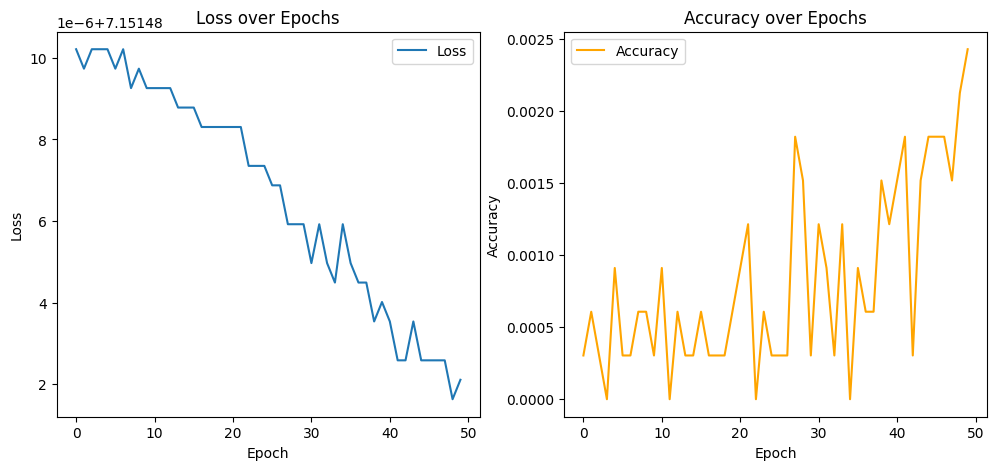

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Define the neural network class with more layers and dropout
class DeepBigramModel(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, dropout_prob=0.5):
        super(DeepBigramModel, self).__init__()
        # Define multiple hidden layers
        self.hidden1 = nn.Linear(input_size, hidden_size1)
        self.dropout1 = nn.Dropout(dropout_prob)
        self.hidden2 = nn.Linear(hidden_size1, hidden_size2)
        self.dropout2 = nn.Dropout(dropout_prob)
        self.output = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        # Pass input through first hidden layer and apply ReLU activation
        hidden_out1 = F.relu(self.hidden1(x))
        hidden_out1 = self.dropout1(hidden_out1)

        # Pass through second hidden layer and apply ReLU activation
        hidden_out2 = F.relu(self.hidden2(hidden_out1))
        hidden_out2 = self.dropout2(hidden_out2)

        # Pass through output layer
        output = self.output(hidden_out2)
        return F.softmax(output, dim=1)

# Initialize the deep model
hidden_size1 = 128  # Number of neurons in the first hidden layer
hidden_size2 = 64   # Number of neurons in the second hidden layer
dropout_prob = 0.5  # Dropout probability
model = DeepBigramModel(input_size=vocab_size, hidden_size1=hidden_size1, hidden_size2=hidden_size2, output_size=vocab_size, dropout_prob=dropout_prob)

# Use the Adam optimizer for better performance
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Reinitialize the loss function (Cross-Entropy Loss)
criterion = nn.CrossEntropyLoss()

# Number of training epochs
epochs = 50

# Convert y_tensor to long (needed for CrossEntropyLoss)
y_tensor = torch.tensor(y, dtype=torch.long)

# Lists to store loss and accuracy for each epoch
losses = []
accuracies = []

# Training loop
for epoch in range(epochs):
    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_one_hot)

    # Calculate loss
    loss = criterion(outputs, y_tensor)

    # Backward pass and optimize
    loss.backward()
    optimizer.step()

    # Store loss
    losses.append(loss.item())

    # Calculate accuracy
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_tensor).sum().item() / len(y_tensor)
    accuracies.append(accuracy)

    # Print loss and accuracy every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')

print("Training complete.")

# Plotting loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.show()


In [ ]:
import torch

def generate_sentence(seed_word, model, max_length=10):
    model.eval()  # Set the model to evaluation mode
    current_word = seed_word
    generated_sentence = [current_word]

    for _ in range(max_length):
        if current_word not in token_to_idx:
            current_word = '<UNK>'  # Use '<UNK>' if the word is not in vocabulary

        current_tensor = torch.eye(vocab_size)[token_to_idx.get(current_word, UNK_IDX)].unsqueeze(0)
        with torch.no_grad():
            output = model(current_tensor)

        # Get the predicted next word index
        predicted_idx = torch.argmax(output).item()
        next_word = idx_to_token.get(predicted_idx, '<UNK>')  # Default to '<UNK>' if index not found

        # Stop generating if a special end token is predicted
        if next_word == '<END>':  # Replace '<END>' with the appropriate end token if you have one
            break

        # Append the predicted word to the sentence
        generated_sentence.append(next_word)

        # Update the current word
        current_word = next_word

    return ' '.join(generated_sentence)

# Define seed words in Spanish
seed_words_spanish = ['aldea', 'numerosos', 'testimonios']

# Generate sentences using different seed words
for seed_word in seed_words_spanish:
    sentence = generate_sentence(seed_word, model)
    print(f"Generated sentence '{seed_word}': {sentence}")


Generated sentence 'aldea': aldea además martes además martes además martes además martes además martes
Generated sentence 'numerosos': numerosos además martes además martes además martes además martes además martes
Generated sentence 'testimonios': testimonios además martes además martes además martes además martes además martes
